In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [3]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.duplicated().sum()

1081

In [9]:
data.drop_duplicates(inplace=True)
data.shape

(283726, 31)

In [10]:
fraud_count = data['Class'].value_counts()
fraud_count

Class
0    283253
1       473
Name: count, dtype: int64

Very Imbalanced Data

In [11]:
print(f"Number of Fraud Transactions are: {fraud_count.values[1]} that is {round(fraud_count.values[1]/len(data)*100,2)}% of the data")
print(f"Number of Non-Fraud Transactions are: {fraud_count.values[0]} that is {round(fraud_count.values[0]/len(data)*100,2)}% of the data")

Number of Fraud Transactions are: 473 that is 0.17% of the data
Number of Non-Fraud Transactions are: 283253 that is 99.83% of the data


In [12]:
min(data['Amount']), max(data['Amount'])

(0.0, 25691.16)

/tmp/ipykernel_36/406453587.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_36/406453587.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histo

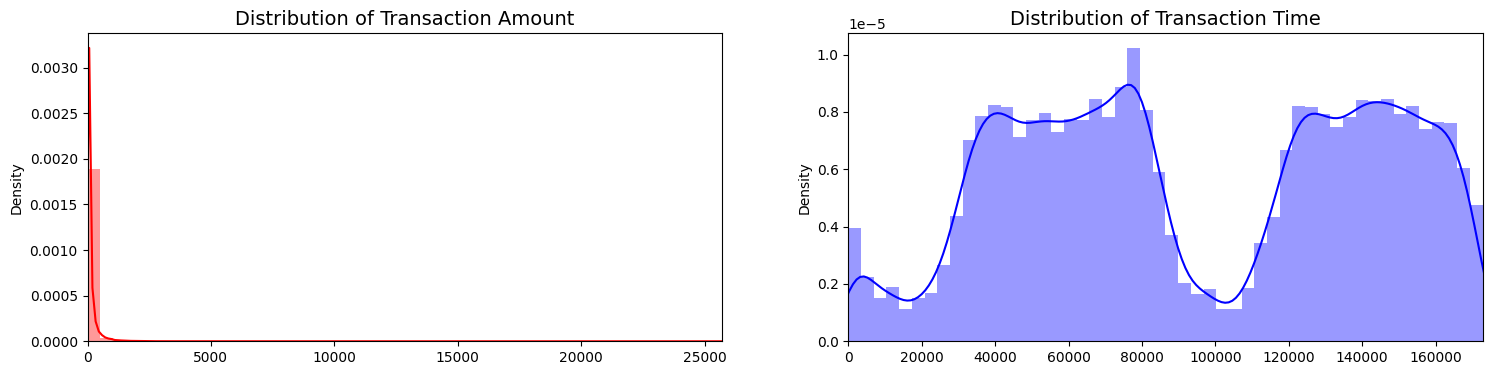

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


plt.show()

In [14]:
fraud = data[data['Class']==1]
non_fraud = data[data['Class']==0]

In [15]:
fraud.shape

(473, 31)

In [16]:
non_fraud.shape

(283253, 31)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 10000.0)

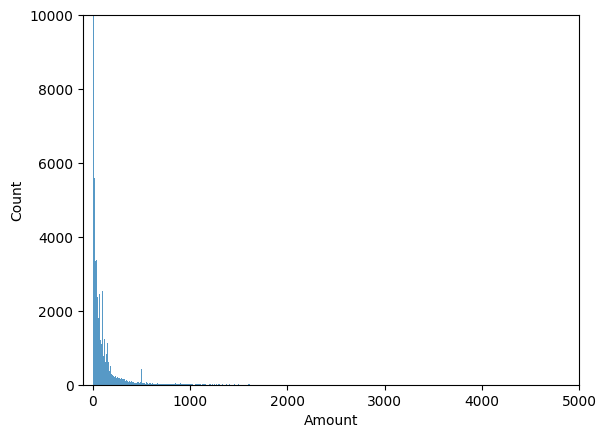

In [17]:
sns.histplot(data['Amount'])
plt.xlim(-100, 5000)
plt.ylim(0, 10000)

In [18]:
data['Amount'].describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

<Axes: >

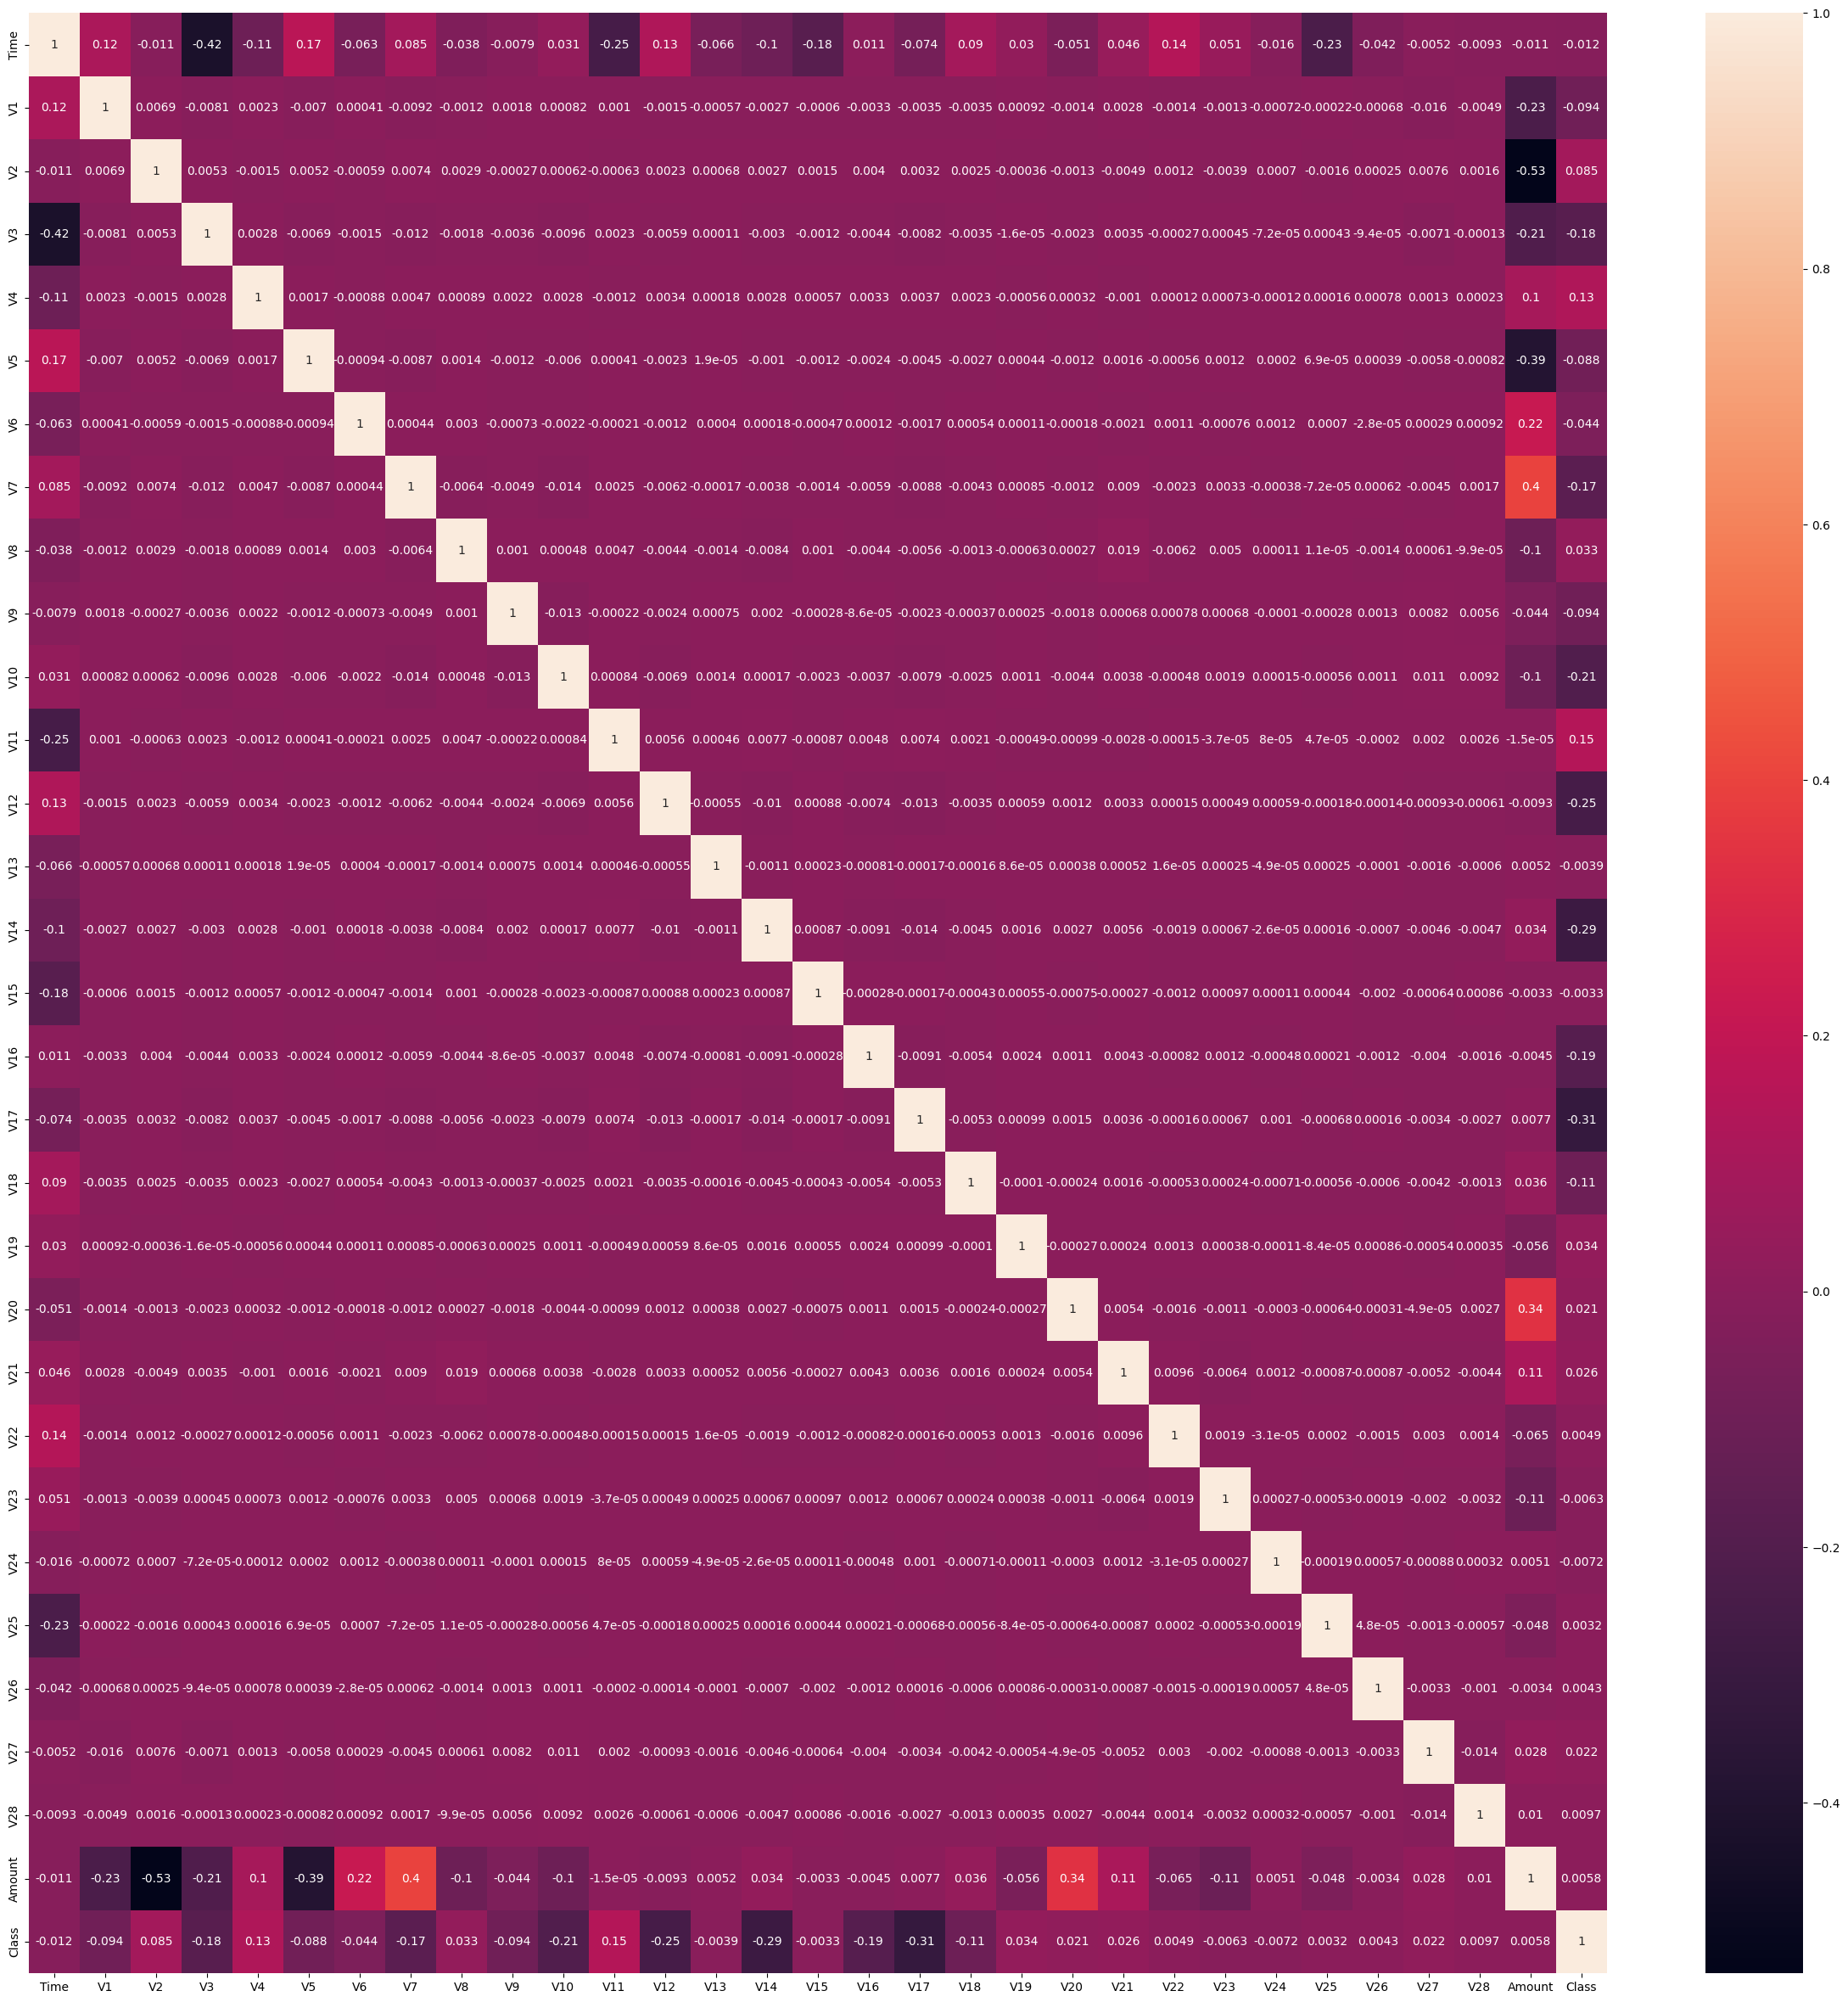

In [19]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True, fmt=".2g")

In [20]:
correlation = data.corr()['Class']
correlation

Time     -0.012359
V1       -0.094486
V2        0.084624
V3       -0.182322
V4        0.129326
V5       -0.087812
V6       -0.043915
V7       -0.172347
V8        0.033068
V9       -0.094021
V10      -0.206971
V11       0.149067
V12      -0.250711
V13      -0.003897
V14      -0.293375
V15      -0.003300
V16      -0.187186
V17      -0.313498
V18      -0.105340
V19       0.033631
V20       0.021486
V21       0.026357
V22       0.004887
V23      -0.006333
V24      -0.007210
V25       0.003202
V26       0.004265
V27       0.021892
V28       0.009682
Amount    0.005777
Class     1.000000
Name: Class, dtype: float64

In [21]:
corr_mean = np.mean(abs(correlation)[:-1])
corr_mean

0.08641169949809004

In [22]:
len(data[data['Amount']==0])

1808

In [23]:
data1 = data.drop(['Time', 'Amount'], axis=1)

## Original 

In [24]:
X = data1.drop('Class', axis=1)
y = data1['Class']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [26]:
print('X_train.shape:',X_train.shape)
print('X_test.shape:',X_test.shape)
print('y_train.shape:',y_train.shape)
print('y_test.shape:',y_test.shape)

X_train.shape: (198608, 28)
X_test.shape: (85118, 28)
y_train.shape: (198608,)
y_test.shape: (85118,)


### Logistic Regression

In [27]:
lr1 = LogisticRegression()
lr1.fit(X_train, y_train)
y_pred_lr1 = lr1.predict(X_test)
print(classification_report(y_test,y_pred_lr1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.87      0.56      0.68       134

    accuracy                           1.00     85118
   macro avg       0.94      0.78      0.84     85118
weighted avg       1.00      1.00      1.00     85118



### Support Vector Machines

In [28]:
svm1 = SVC()
svm1.fit(X_train, y_train)
y_pred_svm1 = svm1.predict(X_test)
print(classification_report(y_test,y_pred_svm1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.94      0.66      0.78       134

    accuracy                           1.00     85118
   macro avg       0.97      0.83      0.89     85118
weighted avg       1.00      1.00      1.00     85118



### KMeans Neighbors

In [29]:
km1 = KNeighborsClassifier()
km1.fit(X_train, y_train)
y_pred_km1 = km1.predict(X_test)
print(classification_report(y_test,y_pred_km1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.92      0.72      0.81       134

    accuracy                           1.00     85118
   macro avg       0.96      0.86      0.91     85118
weighted avg       1.00      1.00      1.00     85118



### Descision Tree Classifier

In [30]:
dt1 = DecisionTreeClassifier()
dt1.fit(X_train, y_train)
y_pred_dt1 = dt1.predict(X_test)
print(classification_report(y_test,y_pred_dt1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.70      0.78      0.73       134

    accuracy                           1.00     85118
   macro avg       0.85      0.89      0.87     85118
weighted avg       1.00      1.00      1.00     85118



### Random Forest Classifier

In [31]:
rf1 = RandomForestClassifier()
rf1.fit(X_train, y_train)
y_pred_rf1 = rf1.predict(X_test)
print(classification_report(y_test,y_pred_rf1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.95      0.75      0.84       134

    accuracy                           1.00     85118
   macro avg       0.98      0.87      0.92     85118
weighted avg       1.00      1.00      1.00     85118



In [32]:
from sklearn.metrics import accuracy_score

print('Logistic Regression: ', accuracy_score(y_test, y_pred_lr1))
print('KNears Neighbors: ', accuracy_score(y_test, y_pred_km1))
print('Support Vector Classifier: ', accuracy_score(y_test, y_pred_svm1))
print('Decision Tree Classifier: ', accuracy_score(y_test, y_pred_dt1))
print('Random Forest Classifier: ', accuracy_score(y_test, y_pred_rf1))

Logistic Regression:  0.999177612255927
KNears Neighbors:  0.9994713221645245
Support Vector Classifier:  0.9994008317864611
Decision Tree Classifier:  0.9991188702742075
Random Forest Classifier:  0.9995418125425879


## Undersampling

In [33]:
non_fraud_balanced = non_fraud.sample(n=473)
non_fraud_balanced.shape

(473, 31)

In [34]:
df_undersampled = pd.concat((fraud, non_fraud_balanced))
df_undersampled.shape

(946, 31)

In [35]:
df_undersampled = df_undersampled.sample(frac=1, random_state=42)
df_undersampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
154697,102625.0,-4.221221,2.871121,-5.888716,6.890952,-3.404894,-1.154394,-7.739928,2.851363,-2.507569,...,1.620591,1.567947,-0.578007,-0.059045,-1.829169,-0.072429,0.136734,-0.599848,7.59,1
8842,12093.0,-4.696795,2.693867,-4.475133,5.467685,-1.556758,-1.549420,-4.104215,0.553934,-1.498468,...,0.573898,-0.080163,0.318408,-0.245862,0.338238,0.032271,-1.508458,0.608075,0.00,1
200046,133255.0,1.977177,0.051774,-0.684187,1.242591,0.076067,-0.202409,-0.089650,-0.037484,0.646040,...,-0.460380,-1.228659,0.508632,0.571726,-0.385530,-1.188340,0.036092,-0.023380,5.00,0
233258,147501.0,-1.611877,-0.408410,-3.829762,6.249462,-3.360922,1.147964,1.858425,0.474858,-3.838399,...,1.245582,0.616383,2.251439,-0.066096,0.538710,0.541325,-0.136243,-0.009852,996.27,1
17317,28625.0,-27.848181,15.598193,-28.923756,6.418442,-20.346228,-4.828202,-19.210896,18.329406,-3.668735,...,1.802149,-2.062934,-1.269843,0.165409,1.999499,-0.211059,1.324809,0.388090,99.99,1


<Axes: xlabel='Time', ylabel='Amount'>

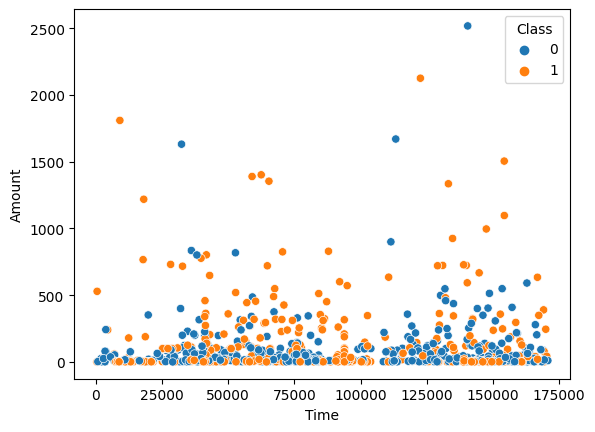

In [36]:
sns.scatterplot(df_undersampled, x='Time', y='Amount', hue='Class')

In [37]:
df_undersampled['Amount'].describe()

count     946.000000
mean      103.199323
std       230.853278
min         0.000000
25%         1.790000
50%        18.960000
75%        99.990000
max      2517.660000
Name: Amount, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Amount', ylabel='Count'>

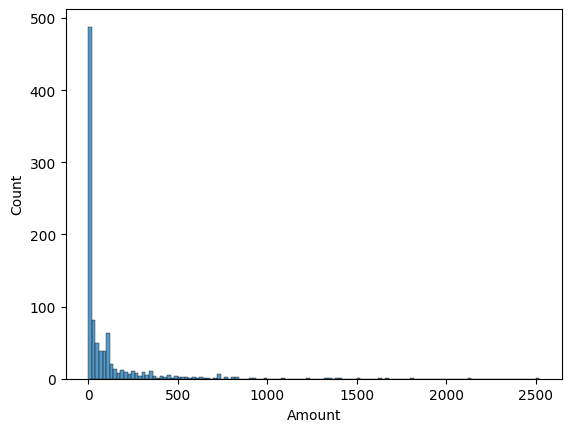

In [38]:
sns.histplot(df_undersampled['Amount'])

<Axes: >

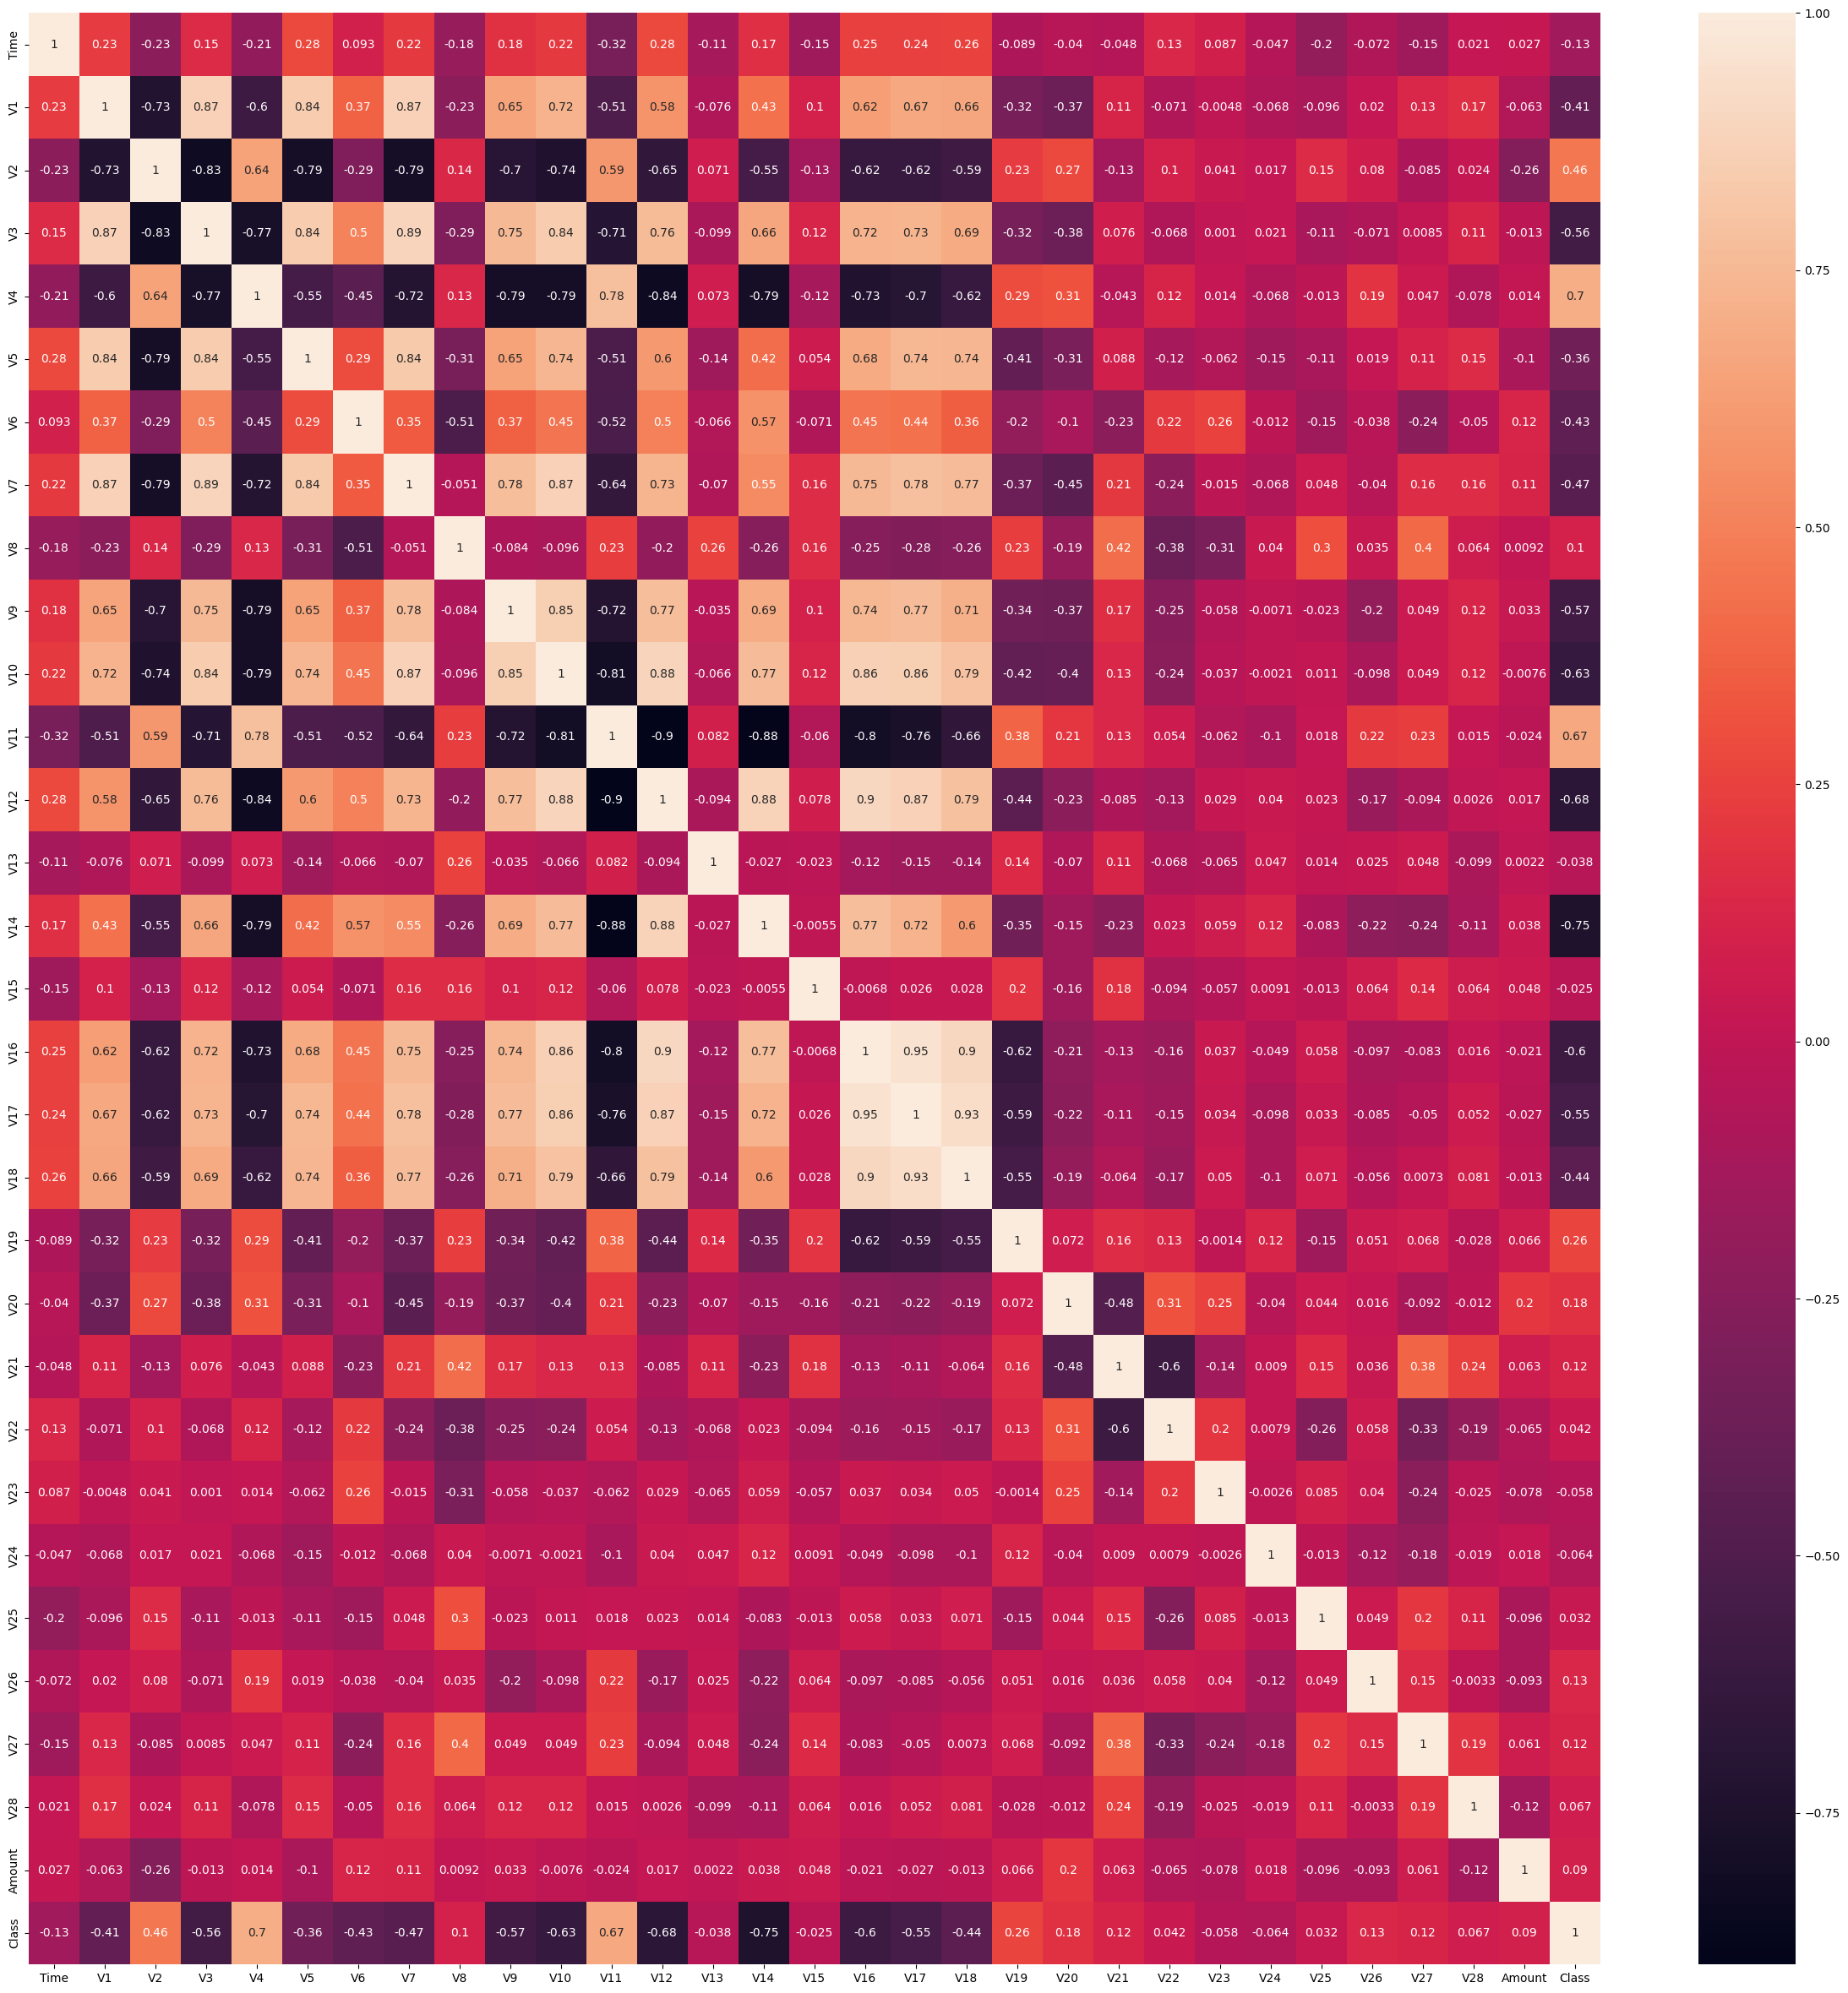

In [39]:
plt.figure(figsize=(30,30))
sns.heatmap(df_undersampled.corr(), annot=True, fmt=".2g")

In [40]:
corr_undersampled = df_undersampled.corr()
corr_undersampled['Class']['V3']

-0.5627992004104138

In [41]:
negative_correlation = [i for i in corr_undersampled['Class'].index if corr_undersampled['Class'][i]< (-0.4)]
negative_correlation

['V1', 'V3', 'V6', 'V7', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V18']

In [42]:
positive_correlation = [i for i in corr_undersampled['Class'].index if corr_undersampled['Class'][i] > 0.2]
positive_correlation

['V2', 'V4', 'V11', 'V19', 'Class']

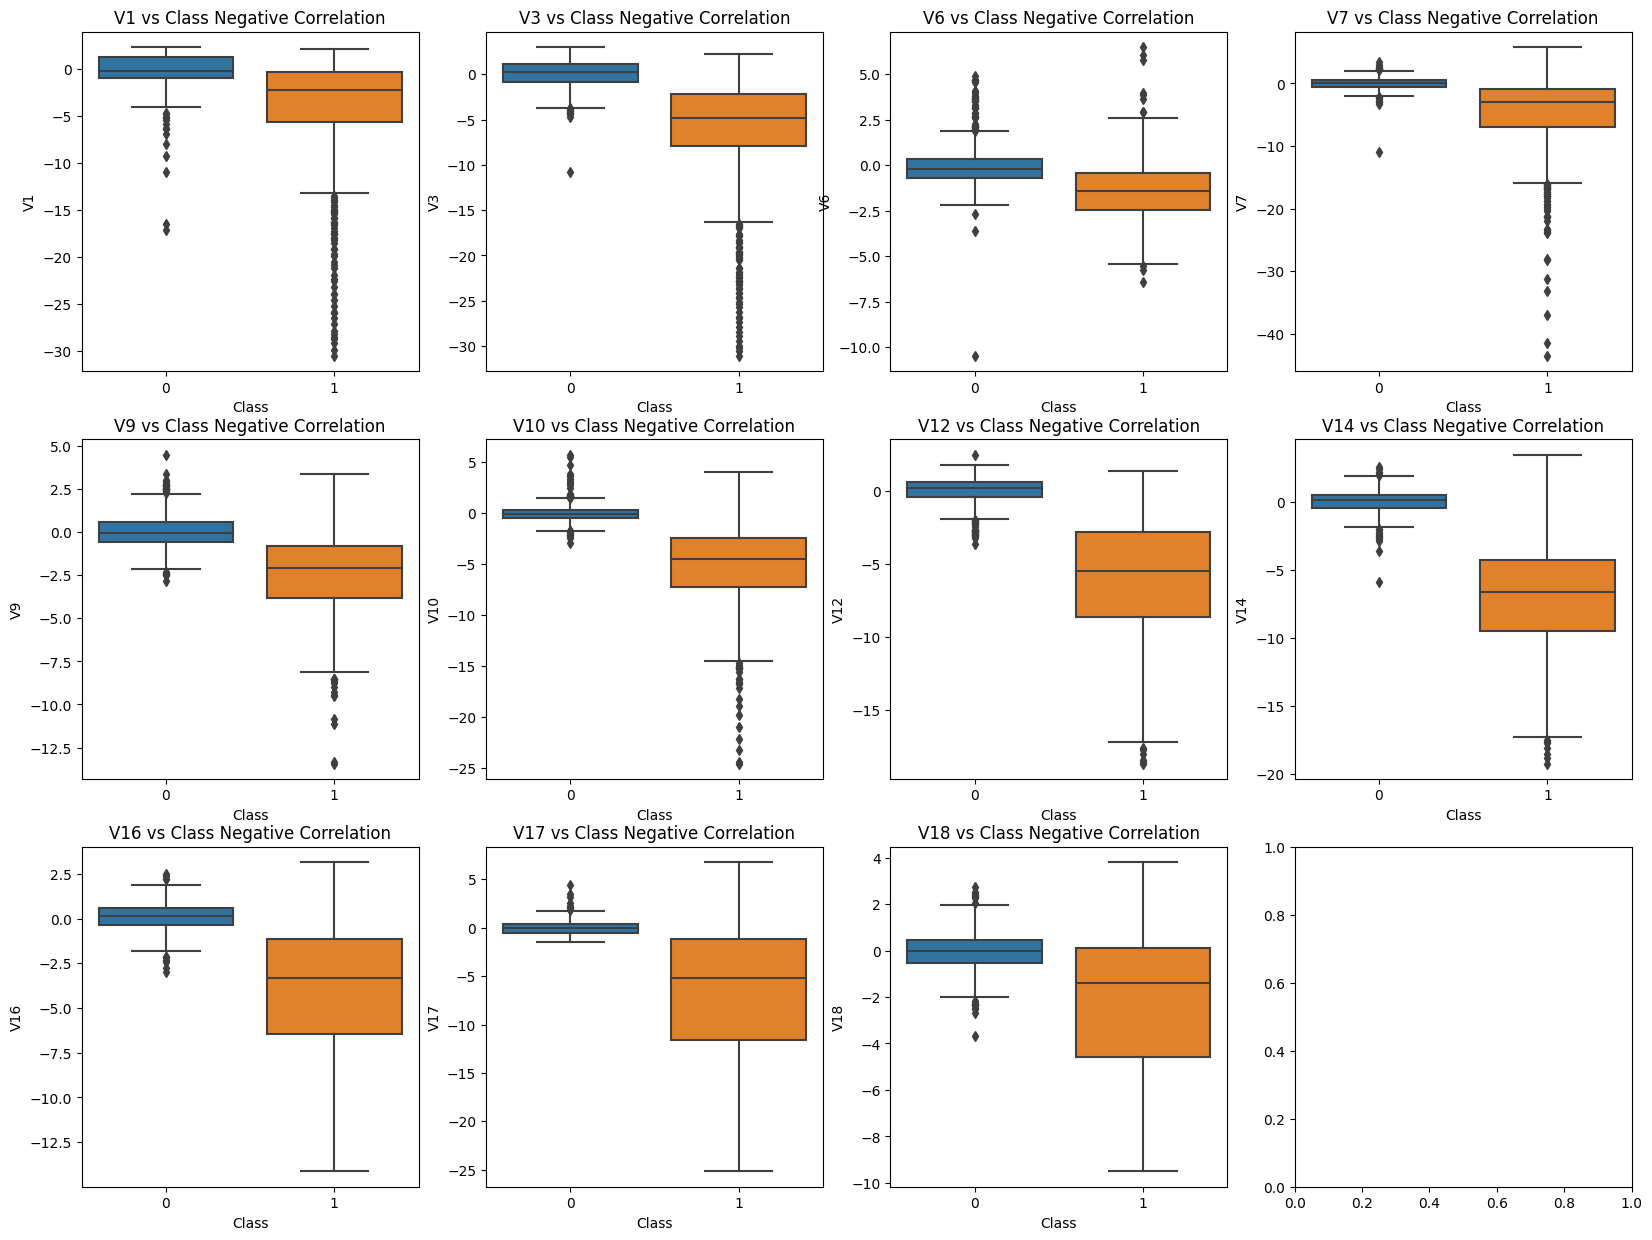

In [43]:
fig, ax = plt.subplots(ncols=4, nrows=3, figsize = (20,15))
j=0 
k=0
for i in negative_correlation:
    if k==4:
        k=0
        j=j+1
    sns.boxplot(x="Class", y=i, data=df_undersampled, ax=ax[j,k])
    ax[j,k].set_title(f'{i} vs Class Negative Correlation')
    k=k+1

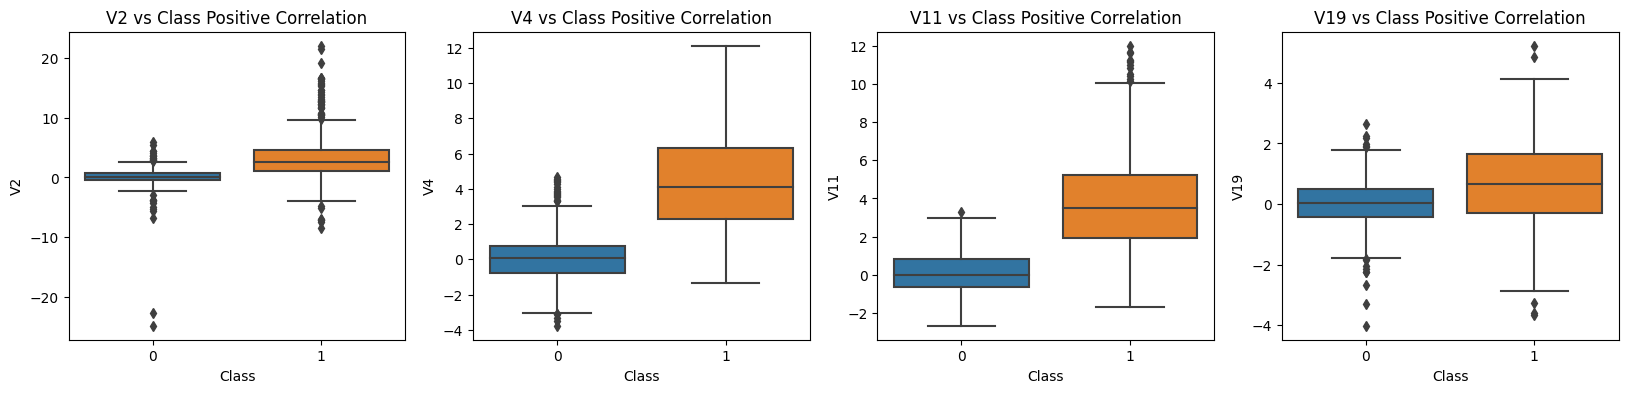

In [44]:
fig, ax = plt.subplots(ncols=4, figsize = (20,4))
j=0 
for i in positive_correlation:
    if j==4:
        break
    sns.boxplot(x="Class", y=i, data=df_undersampled, ax=ax[j])
    ax[j].set_title(f'{i} vs Class Positive Correlation')
    j=j+1

In [45]:
X_us = df_undersampled.drop('Class', axis=1)
y_us = df_undersampled['Class']

In [46]:
X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_us, y_us, random_state=42, test_size=0.3)

In [47]:
print('X_train_undersampled.shape:',X_train_undersampled.shape)
print('X_test_undersampled.shape:',X_test_undersampled.shape)
print('y_train_undersampled.shape:',y_train_undersampled.shape)
print('y_test_undersampled.shape:',y_test_undersampled.shape)

X_train_undersampled.shape: (662, 30)
X_test_undersampled.shape: (284, 30)
y_train_undersampled.shape: (662,)
y_test_undersampled.shape: (284,)


### Logistic Regression

In [48]:
lr2 = LogisticRegression()
lr2.fit(X_train_undersampled, y_train_undersampled)
y_pred_lr2 = lr2.predict(X_test_undersampled)
print(classification_report(y_test_undersampled,y_pred_lr2))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       130
           1       0.95      0.90      0.93       154

    accuracy                           0.92       284
   macro avg       0.92      0.92      0.92       284
weighted avg       0.92      0.92      0.92       284



### Support Vector Machines

In [49]:
svm2 = SVC()
svm2.fit(X_train_undersampled, y_train_undersampled)
y_pred_svm2 = svm2.predict(X_test_undersampled)
print(classification_report(y_test_undersampled,y_pred_svm2))

              precision    recall  f1-score   support

           0       0.51      0.83      0.64       130
           1       0.70      0.34      0.46       154

    accuracy                           0.56       284
   macro avg       0.61      0.58      0.55       284
weighted avg       0.62      0.56      0.54       284



### K Means Neighbours

In [50]:
km2 = KNeighborsClassifier()
km2.fit(X_train_undersampled, y_train_undersampled)
y_pred_km2 = km2.predict(X_test_undersampled)
print(classification_report(y_test_undersampled,y_pred_km2))

              precision    recall  f1-score   support

           0       0.55      0.66      0.60       130
           1       0.66      0.55      0.60       154

    accuracy                           0.60       284
   macro avg       0.60      0.60      0.60       284
weighted avg       0.61      0.60      0.60       284



### Decision Tree 

In [51]:
dt2 = DecisionTreeClassifier()
dt2.fit(X_train_undersampled, y_train_undersampled)
y_pred_dt2 = dt2.predict(X_test_undersampled)
print(classification_report(y_test_undersampled,y_pred_dt2))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       130
           1       0.90      0.92      0.91       154

    accuracy                           0.90       284
   macro avg       0.90      0.90      0.90       284
weighted avg       0.90      0.90      0.90       284



### Random Forest

In [52]:
rf2 = RandomForestClassifier()
rf2.fit(X_train_undersampled, y_train_undersampled)
y_pred_rf2 = rf2.predict(X_test_undersampled)
print(classification_report(y_test_undersampled,y_pred_rf2))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       130
           1       0.97      0.91      0.94       154

    accuracy                           0.93       284
   macro avg       0.93      0.94      0.93       284
weighted avg       0.94      0.93      0.93       284



In [53]:
from sklearn.metrics import accuracy_score

print('Logistic Regression: ', accuracy_score(y_test_undersampled, y_pred_lr2))
print('KNears Neighbors: ', accuracy_score(y_test_undersampled, y_pred_km2))
print('Support Vector Classifier: ', accuracy_score(y_test_undersampled, y_pred_svm2))
print('Decision Tree Classifier: ', accuracy_score(y_test_undersampled, y_pred_dt2))
print('Random Forest Classifier: ', accuracy_score(y_test_undersampled, y_pred_rf2))

Logistic Regression:  0.9225352112676056
KNears Neighbors:  0.5985915492957746
Support Vector Classifier:  0.5633802816901409
Decision Tree Classifier:  0.9049295774647887
Random Forest Classifier:  0.9330985915492958


## Smote - Oversampling

In [54]:
X = data1.drop('Class',axis=1)
y = data1['Class']

In [55]:
X.shape, y.shape

((283726, 28), (283726,))

In [56]:
X_smote,y_smote = SMOTE().fit_resample(X,y)

In [57]:
X_smote.shape, y_smote.shape

((566506, 28), (566506,))

In [58]:
df_smote = pd.concat([pd.DataFrame(X_smote), pd.Series(y_smote, name='Class')], axis=1)
df_smote = df_smote.sample(frac=1).reset_index(drop=True)

In [59]:
df_smote['Class'].value_counts()

Class
1    283253
0    283253
Name: count, dtype: int64

In [60]:
df_smote.duplicated().sum()

8063

In [61]:
df_smote.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

In [62]:
df_smote.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-5.943353,4.578824,-9.429448,6.583936,-6.124113,-3.656965,-10.897254,3.716123,-5.864576,-12.978582,...,1.188419,2.016024,-0.163770,0.049842,0.384919,-0.075571,0.565144,1.789483,0.370275,1
1,-0.948920,1.746762,-0.953955,3.718819,-1.625538,0.098709,-2.935624,1.303277,-2.210098,-1.954409,...,0.346489,0.740578,0.565893,-0.004223,-0.487603,-0.507142,0.304078,0.497219,0.171353,1
2,0.819728,0.076230,-0.227649,2.386889,0.438061,0.208760,0.619566,-0.024578,-1.323751,0.777383,...,0.192755,0.151878,0.011837,-0.286334,-0.286325,0.606662,0.081494,-0.061165,0.024585,0
3,0.034609,1.471345,1.017029,4.188684,1.415832,0.809262,1.132190,-0.406123,-1.674369,2.207055,...,0.423487,-0.320839,-0.393825,0.157223,0.427555,-0.896713,-0.044554,0.028187,-0.180594,0
4,-1.243045,3.406185,-6.297274,3.114579,-1.036022,-2.330543,-2.199469,0.976214,-2.817955,-5.639542,...,0.674167,0.904438,0.558561,-0.083230,-0.065053,0.013096,0.300148,0.635405,0.361870,1


In [63]:
df_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566506 entries, 0 to 566505
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      566506 non-null  float64
 1   V2      566506 non-null  float64
 2   V3      566506 non-null  float64
 3   V4      566506 non-null  float64
 4   V5      566506 non-null  float64
 5   V6      566506 non-null  float64
 6   V7      566506 non-null  float64
 7   V8      566506 non-null  float64
 8   V9      566506 non-null  float64
 9   V10     566506 non-null  float64
 10  V11     566506 non-null  float64
 11  V12     566506 non-null  float64
 12  V13     566506 non-null  float64
 13  V14     566506 non-null  float64
 14  V15     566506 non-null  float64
 15  V16     566506 non-null  float64
 16  V17     566506 non-null  float64
 17  V18     566506 non-null  float64
 18  V19     566506 non-null  float64
 19  V20     566506 non-null  float64
 20  V21     566506 non-null  float64
 21  V22     56

In [64]:
X_smote = df_smote.drop('Class', axis=1)
y_smote = df_smote['Class']

In [65]:
X_smote.shape, y_smote.shape

((566506, 28), (566506,))

In [66]:
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_smote, y_smote, random_state=42, test_size=0.3)

In [67]:
print('X_train_oversampled.shape:',X_train_oversampled.shape)
print('X_test_oversampled.shape:',X_test_oversampled.shape)
print('y_train_oversampled.shape:',y_train_oversampled.shape)
print('y_test_oversampled.shape:',y_test_oversampled.shape)

X_train_oversampled.shape: (396554, 28)
X_test_oversampled.shape: (169952, 28)
y_train_oversampled.shape: (396554,)
y_test_oversampled.shape: (169952,)


### Logistic Regression

In [68]:
lr3 = LogisticRegression()
lr3.fit(X_train_oversampled, y_train_oversampled)
y_pred_lr3 = lr3.predict(X_test_oversampled)
print(classification_report(y_test_oversampled,y_pred_lr3))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     84990
           1       0.97      0.91      0.94     84962

    accuracy                           0.94    169952
   macro avg       0.94      0.94      0.94    169952
weighted avg       0.94      0.94      0.94    169952



### Support Vector Machines

In [69]:
svm3 = SVC()
svm3.fit(X_train_oversampled, y_train_oversampled)
y_pred_svm3 = svm3.predict(X_test_oversampled)
print(classification_report(y_test_oversampled,y_pred_svm3))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     84990
           1       0.98      0.98      0.98     84962

    accuracy                           0.98    169952
   macro avg       0.98      0.98      0.98    169952
weighted avg       0.98      0.98      0.98    169952



### KMeans Neighbors

In [70]:
km3 = KNeighborsClassifier()
km3.fit(X_train_oversampled, y_train_oversampled)
y_pred_km3 = km3.predict(X_test_oversampled)
print(classification_report(y_test_oversampled,y_pred_km3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84990
           1       1.00      1.00      1.00     84962

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952



### Decision Tree Classifier

In [71]:
dt3 = DecisionTreeClassifier()
dt3.fit(X_train_oversampled, y_train_oversampled)
y_pred_dt3 = dt3.predict(X_test_oversampled)
print(classification_report(y_test_oversampled,y_pred_dt3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84990
           1       1.00      1.00      1.00     84962

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952



### Random Forest Classifer

In [72]:
rf3 = RandomForestClassifier()
rf3.fit(X_train_oversampled, y_train_oversampled)
y_pred_rf3 = rf3.predict(X_test_oversampled)
print(classification_report(y_test_oversampled,y_pred_rf3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84990
           1       1.00      1.00      1.00     84962

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952



In [73]:
classifiers=['Logistic Regression', 'SVM', 'KNeighbors Classifier', 'DecisionTree Classifier', 'RandomForest Classifier']

In [83]:
evaluation_metrics=['Accuracy', 'Precision', 'Recall', 'F1-Score']

In [74]:
predictions1 = [y_pred_lr1, y_pred_svm1, y_pred_km1, y_pred_dt1, y_pred_rf1]
predictions2 = [y_pred_lr2, y_pred_svm2, y_pred_km2, y_pred_dt2, y_pred_rf2]
predictions3 = [y_pred_lr3, y_pred_svm3, y_pred_km3, y_pred_dt3, y_pred_rf3]

In [75]:
accuracy_scores1 = []
precision_scores1 = []
recall_scores1 = []
f1_scores1 = []
for pred in predictions1:
    accuracy_scores1.append(accuracy_score(y_test,pred))
    precision_scores1.append(precision_score(y_test,pred))
    recall_scores1.append(recall_score(y_test,pred))
    f1_scores1.append(f1_score(y_test,pred))

In [76]:
accuracy_scores2 = []
precision_scores2 = []
recall_scores2 = []
f1_scores2 = []
for pred in predictions2:
    accuracy_scores2.append(accuracy_score(y_test_undersampled,pred))
    precision_scores2.append(precision_score(y_test_undersampled,pred))
    recall_scores2.append(recall_score(y_test_undersampled,pred))
    f1_scores2.append(f1_score(y_test_undersampled,pred))

In [78]:
accuracy_scores3 = []
precision_scores3 = []
recall_scores3 = []
f1_scores3 = []
for pred in predictions3:
    accuracy_scores3.append(accuracy_score(y_test_oversampled,pred))
    precision_scores3.append(precision_score(y_test_oversampled,pred))
    recall_scores3.append(recall_score(y_test_oversampled,pred))
    f1_scores3.append(f1_score(y_test_oversampled,pred))

In [112]:
#Evaluation Metrics of models with original dataset
eval1 = pd.DataFrame([accuracy_scores1, precision_scores1, recall_scores1, f1_scores1], index=evaluation_metrics, columns=classifiers).T
eval1

,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.999178,0.872093,0.559701,0.681818
SVM,0.999401,0.936842,0.664179,0.777293
KNeighbors Classifier,0.999471,0.923810,0.723881,0.811715
DecisionTree Classifier,0.999119,0.697987,0.776119,0.734982
RandomForest Classifier,0.999542,0.952381,0.746269,0.836820


In [113]:
#Evaluation Metrics of models with undersampled dataset
eval2 = pd.DataFrame([accuracy_scores2, precision_scores2, recall_scores2, f1_scores2], index=evaluation_metrics, columns=classifiers).T
eval2

,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.922535,0.952055,0.902597,0.926667
SVM,0.563380,0.702703,0.337662,0.456140
KNeighbors Classifier,0.598592,0.656250,0.545455,0.595745
DecisionTree Classifier,0.904930,0.904459,0.922078,0.913183
RandomForest Classifier,0.933099,0.965517,0.909091,0.936455


In [114]:
#Evaluation Metrics of models with oversampled dataset
eval3 = pd.DataFrame([accuracy_scores3, precision_scores3, recall_scores3, f1_scores3], index=evaluation_metrics, columns=classifiers).T
eval3

,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.943196,0.971099,0.913561,0.941452
SVM,0.979706,0.981909,0.977413,0.979656
KNeighbors Classifier,0.999000,0.998003,1.000000,0.999001
DecisionTree Classifier,0.997911,0.997144,0.998682,0.997912
RandomForest Classifier,0.999882,0.999765,1.000000,0.999882


In [115]:
eval1.index

Index(['Logistic Regression', 'SVM', 'KNeighbors Classifier',
       'DecisionTree Classifier', 'RandomForest Classifier'],
      dtype='object')

In [116]:
print("eval1 shape:", eval1.shape)
print("eval1 index:", eval1.index)
print("eval2 shape:", eval2.shape)
print("eval2 index:", eval2.index)
print("eval3 shape:", eval3.shape)
print("eval3 index:", eval3.index)

eval1 shape: (5, 4)
eval1 index: Index(['Logistic Regression', 'SVM', 'KNeighbors Classifier',
       'DecisionTree Classifier', 'RandomForest Classifier'],
      dtype='object')
eval2 shape: (5, 4)
eval2 index: Index(['Logistic Regression', 'SVM', 'KNeighbors Classifier',
       'DecisionTree Classifier', 'RandomForest Classifier'],
      dtype='object')
eval3 shape: (5, 4)
eval3 index: Index(['Logistic Regression', 'SVM', 'KNeighbors Classifier',
       'DecisionTree Classifier', 'RandomForest Classifier'],
      dtype='object')


In [128]:
import pandas as pd

# Adding a new column for sampling strategy
eval1['Sampling Strategy'] = 'Original'
eval2['Sampling Strategy'] = 'Undersampling'
eval3['Sampling Strategy'] = 'Oversampling'

# Concatenate dataframes
df_combined = pd.concat([eval1, eval2, eval3])
df_combined.reset_index(inplace=True)  # To use 'Model' as a column, not index

In [129]:
df_combined

,index,Accuracy,Precision,Recall,F1-Score,Sampling Strategy
0,Logistic Regression,0.999178,0.872093,0.559701,0.681818,Original
1,SVM,0.999401,0.936842,0.664179,0.777293,Original
2,KNeighbors Classifier,0.999471,0.923810,0.723881,0.811715,Original
3,DecisionTree Classifier,0.999119,0.697987,0.776119,0.734982,Original
4,RandomForest Classifier,0.999542,0.952381,0.746269,0.836820,Original
5,Logistic Regression,0.922535,0.952055,0.902597,0.926667,Undersampling
6,SVM,0.563380,0.702703,0.337662,0.456140,Undersampling
7,KNeighbors Classifier,0.598592,0.656250,0.545455,0.595745,Undersampling
8,DecisionTree Classifier,0.904930,0.904459,0.922078,0.913183,Undersampling
9,RandomForest Classifier,0.933099,0.965517,0.909091,0.936455,Undersampling


/tmp/ipykernel_36/1453381601.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted[df_melted['Sampling Strategy']=='Original'], x='Model', y='Score', hue='Metric', ci=None, palette='viridis')


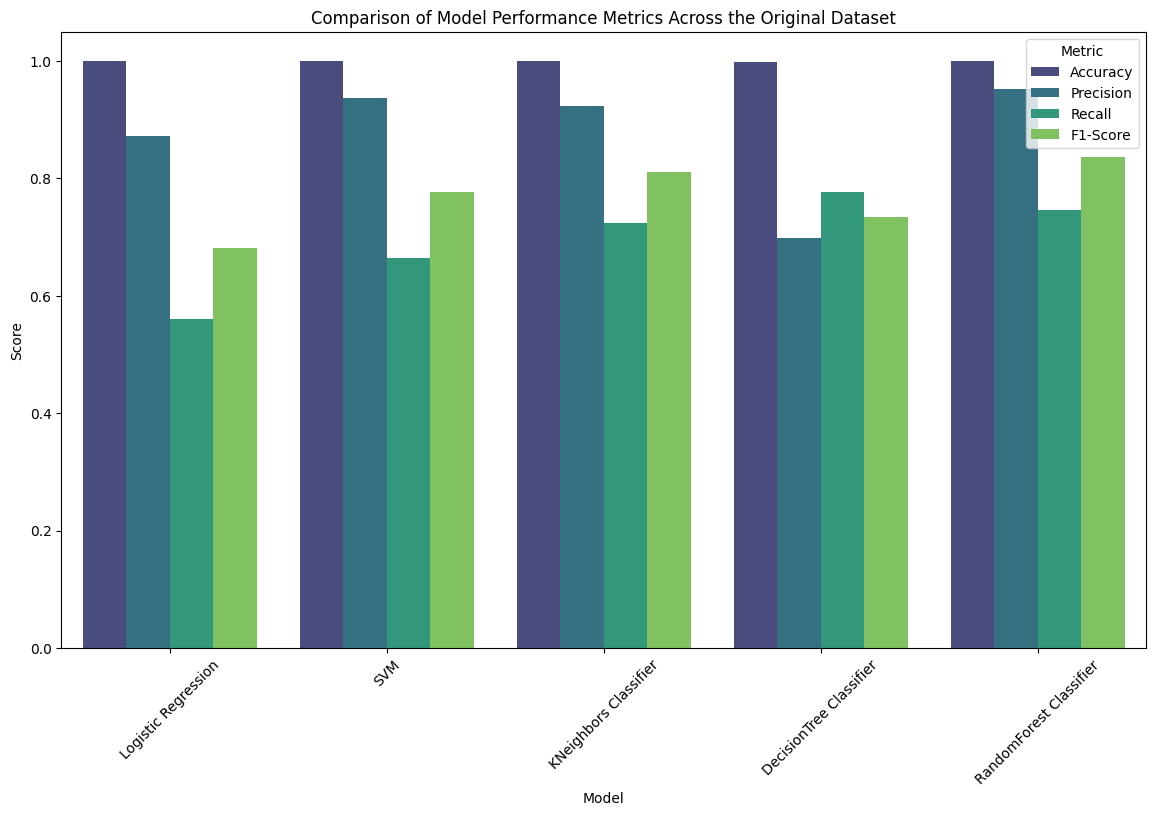

In [134]:
# Melt the dataframe for easier plotting
df_melted = df_combined.melt(id_vars=['index', 'Sampling Strategy'], var_name='Metric', value_name='Score')
df_melted.rename(columns={'index': 'Model'}, inplace=True)

plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted[df_melted['Sampling Strategy']=='Original'], x='Model', y='Score', hue='Metric', ci=None, palette='viridis')
plt.xticks(rotation=45)
plt.title('Comparison of Model Performance Metrics Across the Original Dataset')
plt.show()

/tmp/ipykernel_36/3736442886.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted[df_melted['Sampling Strategy']=='Undersampling'], x='Model', y='Score', hue='Metric', ci=None, palette='viridis')


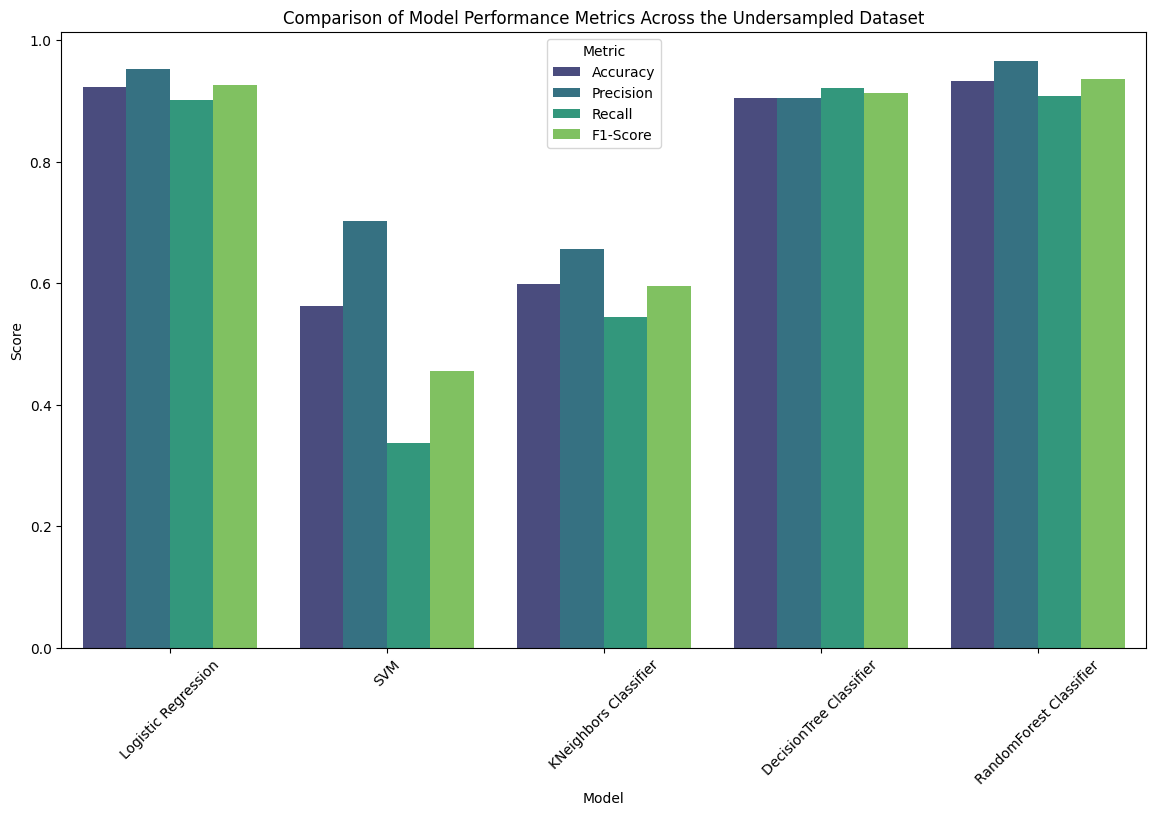

In [135]:
# Melt the dataframe for easier plotting
df_melted = df_combined.melt(id_vars=['index', 'Sampling Strategy'], var_name='Metric', value_name='Score')
df_melted.rename(columns={'index': 'Model'}, inplace=True)

plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted[df_melted['Sampling Strategy']=='Undersampling'], x='Model', y='Score', hue='Metric', ci=None, palette='viridis')
plt.xticks(rotation=45)
plt.title('Comparison of Model Performance Metrics Across the Undersampled Dataset')
plt.show()

/tmp/ipykernel_36/3049913956.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted[df_melted['Sampling Strategy']=='Oversampling'], x='Model', y='Score', hue='Metric', ci=None, palette='viridis')


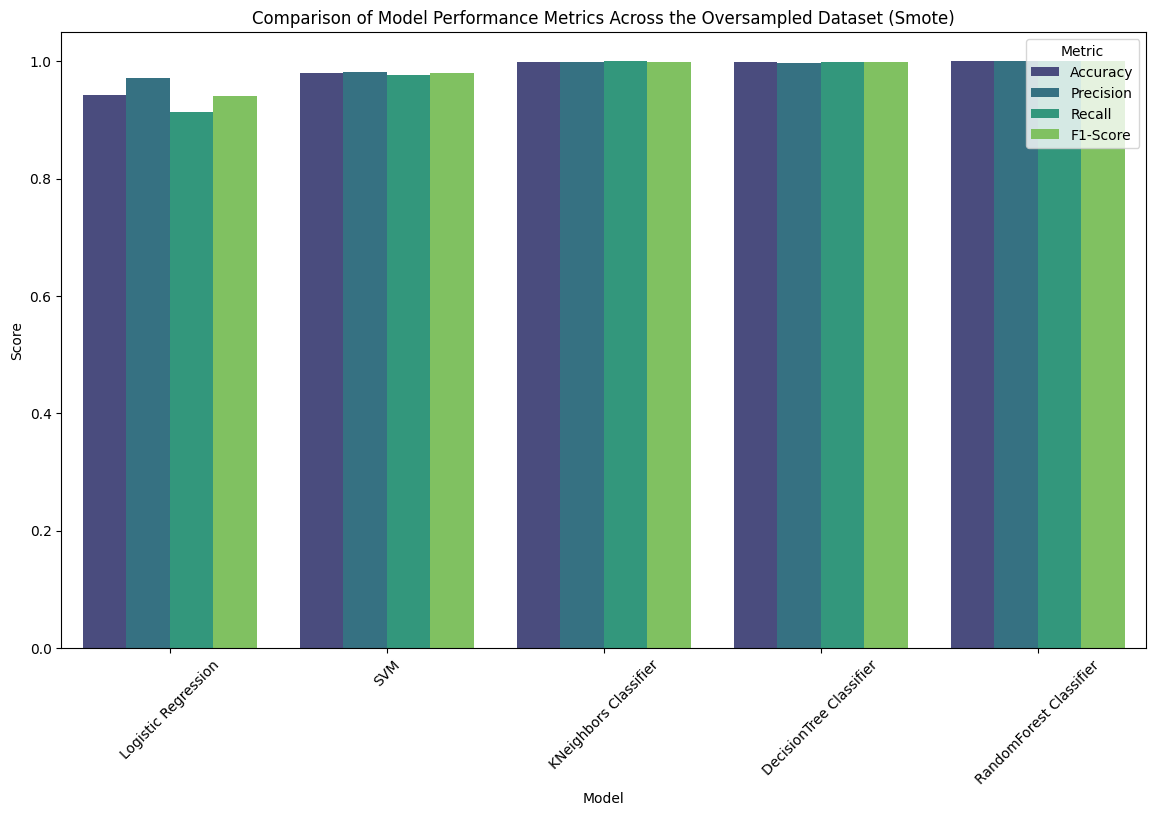

In [137]:
# Melt the dataframe for easier plotting
df_melted = df_combined.melt(id_vars=['index', 'Sampling Strategy'], var_name='Metric', value_name='Score')
df_melted.rename(columns={'index': 'Model'}, inplace=True)

plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted[df_melted['Sampling Strategy']=='Oversampling'], x='Model', y='Score', hue='Metric', ci=None, palette='viridis')
plt.xticks(rotation=45)
plt.title('Comparison of Model Performance Metrics Across the Oversampled Dataset (Smote)')
plt.show()

/tmp/ipykernel_36/389093027.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x='Model', y='Score', hue='Sampling Strategy', ci=None, palette='bone')


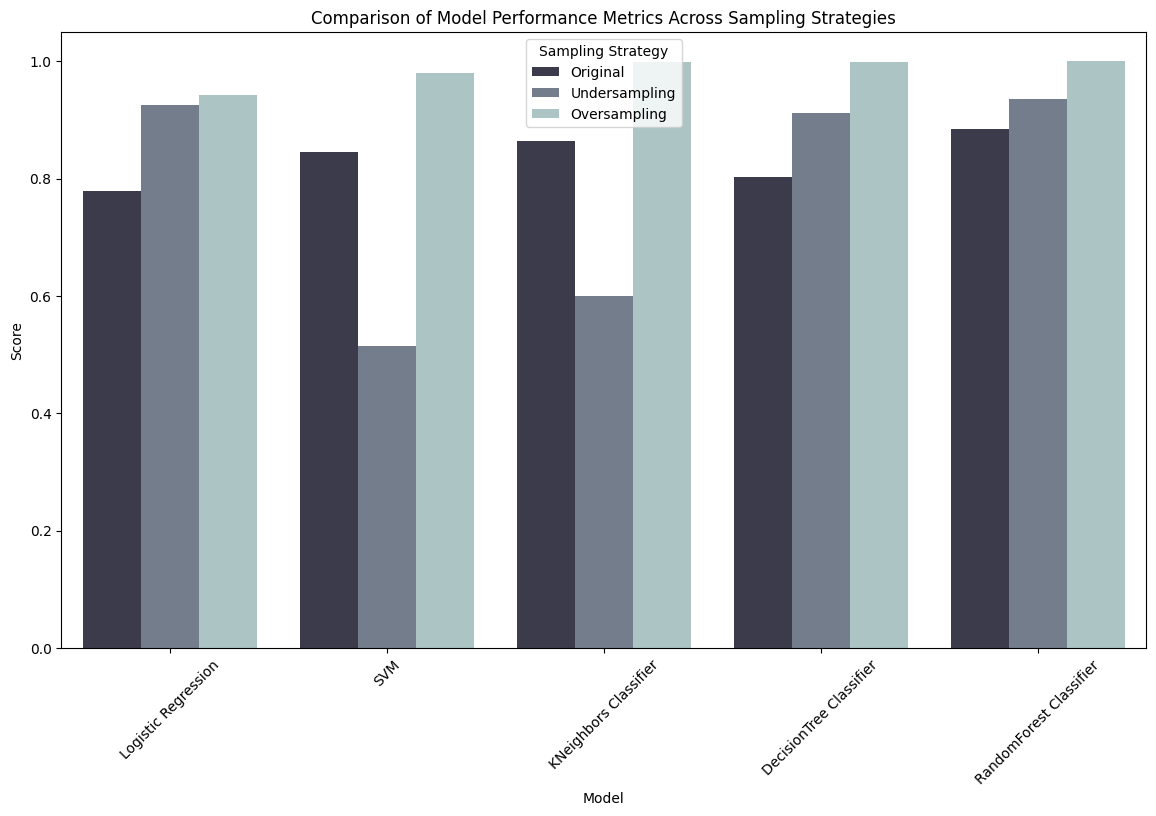

In [147]:
# Melt the dataframe for easier plotting
df_melted = df_combined.melt(id_vars=['index', 'Sampling Strategy'], var_name='Metric', value_name='Score')
df_melted.rename(columns={'index': 'Model'}, inplace=True)

plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Sampling Strategy', ci=None, palette='bone')
plt.xticks(rotation=45)
plt.title('Comparison of Model Performance Metrics Across Sampling Strategies')
plt.show()